## Computer Vision Libraries in Pytorch
* `torchvision` - base domain library for Pytorch computer vision
* `torchvision.dataset` - get datasets and data loading functions
* `torchvision.models` - get pretrained computer vision models  
* `torchvision.transforms` - functions for manipulating vision data (images) for use in ML model
* `torch.utils.data.Dataset` - Base dataset class for Pytorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib - visualize
import matplotlib.pyplot as plt

# Check Versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


In [ ]:
# Setup Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Getting the Dataset
The dataset FashionMNIST from torchvision.datasets will be used.

In [ ]:
# Training Data
train_data = datasets.FashionMNIST(
    root = "DATA", # Root directory, where data will be saved
    train = True, # Do we want training version of the data or testing version
    download = True, # Download data
    transform= torchvision.transforms.ToTensor(), # ToTensor(), how do we want to manipulate the data? Convert data into TENSORS
    target_transform = None # How do we want to manipulate the labels/targets?
)

# Testing Data
test_data = datasets.FashionMNIST(
    root ="DATA",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform= None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.2MB/s]


Extracting DATA/FashionMNIST/raw/train-images-idx3-ubyte.gz to DATA/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 179kB/s]


Extracting DATA/FashionMNIST/raw/train-labels-idx1-ubyte.gz to DATA/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.26MB/s]


Extracting DATA/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to DATA/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 22.8MB/s]

Extracting DATA/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to DATA/FashionMNIST/raw



# Checking Input & Output shapes of Data

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image,label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Get a dictionary with class labels and index
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
print(f"Image Shape: {image.shape} -> [color_channels , width , height]") # color_channels [0,1] because data is GREYSCALE so white may be 1 while black is 0 and grey inbetween
print(f"Label: {class_name[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels , width , height]
Label: Ankle boot


In [ ]:
image.shape

torch.Size([1, 28, 28])

# Visualize the image

Image Shape: torch.Size([1, 28, 28])
Image Shape after permuation: torch.Size([28, 28, 1])
Image Shape after reversing permuation: torch.Size([1, 28, 28])


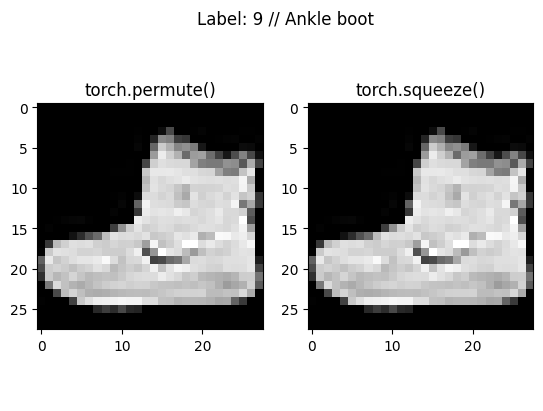

In [ ]:
print(f"Image Shape: {image.shape}") # (C,W,H)
plt.title(f"Label: 9 // {class_name[label]}")
plt.axis("off") # Removes axis of main
plt.subplot(1,2,1)
plt.title(f"torch.permute()")
image = image.permute(1,2,0) # Matplotlib expects (Weidth,Height) or (W,H,C) so permute can help dimensionality permutation (alteration)
print(f"Image Shape after permuation: {image.shape}")
plt.imshow(image, cmap = "gray")
plt.subplot(1,2,2)
plt.title("torch.squeeze()") # Returns a tensor with all specified dimensions of input of size 1 removed
plt.imshow(image.squeeze(),cmap = "gray")
plt.plot()
image = image.permute(2,0,1) # permute() is a view of the original tensor hence change back to original shape
print(f"Image Shape after reversing permuation: {image.shape}")




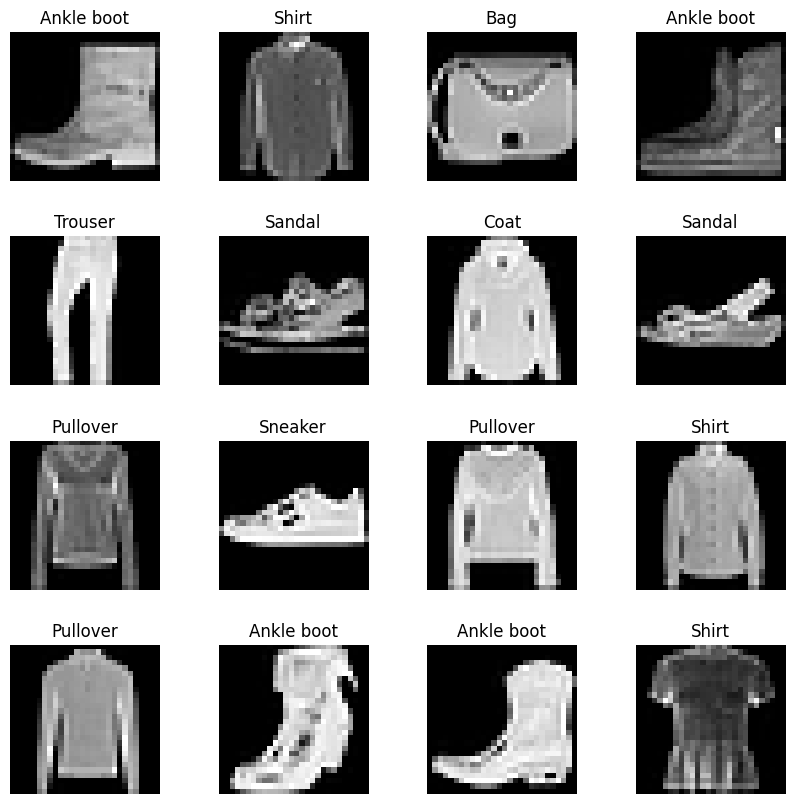

In [ ]:
# Plot more Images
torch.manual_seed(42)
row,col = 4,4
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.3) # Provide some spacing between subplots

for i in range(1,row*col+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  # print(random_idx)
  image,label = train_data[random_idx]
  plt.subplot(row,col,i)
  plt.title(f"{class_name[label]}")
  plt.axis(False) # Turn Off Axis
  plt.imshow(image.squeeze(),cmap="gray")

# Prepare Dataloader
* Dataloader turns dataset into Python iterable.
* More specifically, we want to turn our data into batches or minibatches.

Why do this?
1. It is more computationally efficient, computer hardware may not be able to look at 60000 images all at once (store in memory). So we break it down to 32 images at a time (batch size of 32)
2. It gives out neural network more chances to update its gradients per batch.

In [ ]:
from torch.utils.data import DataLoader

# Hyperparameters

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True # Make the batch size consist of random samples from the dataset
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f304046c890>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3040633d50>)

In [ ]:
# Let's check out what we have created
print(f"Train Dataloader: {train_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"\nTest Dataloader: {train_dataloader}")
print(f"Length of test dataloader: {len(test_dataloader)} Batches of {BATCH_SIZE}")

Train Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7f304046c890>
Length of train dataloader: 1875 batches of 32

Test Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7f304046c890>
Length of test dataloader: 313 Batches of 32


In [ ]:
# Visualize what's inside a Batch
train_feature_batch, train_label_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

* `train_dataloader`: In PyTorch, a `DataLoader` is an iterable that provides batches of data. Each iteration returns a batch containing input data (e.g., images or features) and corresponding labels.

* `iter(train_dataloader)`: Converts the `DataLoader` object into an iterator, allowing you to manually fetch batches.

* `next(...)`: Fetches the first batch from the `train_dataloader` iterator.

Image Shape: torch.Size([1, 28, 28])
Label: 8, torch.Size([])


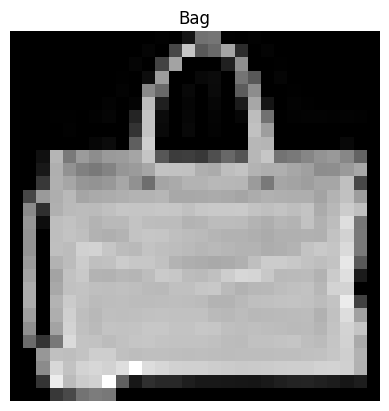

In [ ]:
random_idx = torch.randint(0,len(train_feature_batch),size = [1]).item()
img,label = train_feature_batch[random_idx],train_label_batch[random_idx]
plt.title(f"{class_name[label]}")
plt.axis(False)
plt.imshow(img.squeeze(),cmap="gray")
plt.plot()
print(f"Image Shape: {img.shape}")
print(f"Label: {label}, {label.shape}")

# Flatten Layer
* 1 value per pixel

In [ ]:
print(f"Shape before flattening: {train_feature_batch[0].shape}")
flatten_layer = nn.Flatten()
print(f"Shape after flattening: {flatten_layer(train_feature_batch[0]).shape}") # 28*28 = 783 -> 1 value per pixel -> batch_size, [channels * height * width]
# Flatten the image to pass it as a single vector to the model

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


# Get Helper Functions

In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("File Already Exists")
else:
  print("Downloading Helper Functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

import helper_functions
from helper_functions import accuracy_fn

# Creating a time function

Machine learning is very experimental.

It is important to keep track of two things.
1. Model's performance (Loss / Accuracy Metrics)
2. Time (How fast it runs)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints device and time difference between start and end times
  Args:
  start (float): Starting time of computation - preferred in timeit format
  end (float): End time of computation
  device([type], optional): Device on which model is running, default is None

  Returns:
  float: time between start and end in seconds (higher is longer)
  """

  total_time = end - start
  print(f"Train Time on Device {device}: {total_time:.3f} seconds")
  return total_time

# Base Model
* It is good practice to create a base model when experimenting.
* The base model can then be modified to make it a better fit for our dataset./


In [ ]:
model_V0 = nn.Sequential(
    nn.Flatten(), # Because we've now turned our pixel data from height and width dimensions into one long feature vector.
    nn.Linear(in_features=784,out_features=16), # 784 output from Flatten layer [color_channels, height*width]
    nn.Linear(in_features = 16, out_features = len(class_name)) # 10 as in 10 labels from class_name
)
model_V0

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=16, bias=True)
  (2): Linear(in_features=16, out_features=10, bias=True)
)

In [ ]:
type(class_name),len(class_name),class_name

(list,
 10,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

# Set up Loss and Optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_V0.parameters(),lr = 0.1)

# Training and Testing Loop
* Loop through Epochs
* Loop through Training batches, perform steps, calulating train loss per batch
* Loop through Testing batches, perform steps, calculating test loss per batch
* Print what's happening
* Time it out

In [ ]:
len(train_data),len(train_dataloader.dataset),len(train_dataloader)

(60000, 60000, 1875)

In [ ]:
# Get a progress bar
from tqdm.auto import tqdm # Progress bar

# Random Seed & Start Timer
torch.manual_seed(42)
train_time_start_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    # Training Mode
    model_V0.train()
    # 1. Forward Pass
    y_preds = model_V0(X)
    # 2. Calculate Loss (Per Batch)
    loss = loss_fn(y_preds,y)
    train_loss += loss # accumulatively add up loss per epoch
    # 4. Optimizer Zero Grad
    optimizer.zero_grad()
    # 5. Loss Backward (Backpropagation)
    loss.backward()
    # 6. Optimizer Step (Gradient Descent)
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Number of Samples: {batch * len(X)} / {len(train_dataloader.dataset)}")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(train_dataloader)

  # Testing
  model_V0.eval()
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for X,y in test_dataloader:
      # 1. Forward Pass
      test_preds = model_V0(X)
      # 2. Calculate Loss (accumulatively)
      test_loss += loss_fn(test_preds,y) # accumulatively add up the loss per epoch
      # 3. Calculate accuracy (preds need to be same as y_true)
      test_acc += accuracy_fn(y_true=y,y_pred = test_preds.argmax(dim=1))

   # Calculations on test metrics need to happen inside torch.inference_mode()
   # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  ## Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_V0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Number of Samples: 0 / 60000
Number of Samples: 12800 / 60000
Number of Samples: 25600 / 60000
Number of Samples: 38400 / 60000
Number of Samples: 51200 / 60000

Train loss: 0.58487 | Test loss: 0.50361, Test acc: 82.39%

Epoch: 1
------
Number of Samples: 0 / 60000
Number of Samples: 12800 / 60000
Number of Samples: 25600 / 60000
Number of Samples: 38400 / 60000
Number of Samples: 51200 / 60000

Train loss: 0.47510 | Test loss: 0.48269, Test acc: 83.10%

Epoch: 2
------
Number of Samples: 0 / 60000
Number of Samples: 12800 / 60000
Number of Samples: 25600 / 60000
Number of Samples: 38400 / 60000
Number of Samples: 51200 / 60000

Train loss: 0.45420 | Test loss: 0.47651, Test acc: 83.49%

Train Time on Device cpu: 37.497 seconds


# Make predictions
* Create a function such that later on, different models can be compared.

In [ ]:
# Set Random Seed
torch.manual_seed(42)
def eval_mode(model: torch.nn.Module,
              model_name: str,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Returns:
  A dictionary containing Model metrics based on predictions made.
  """
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Put Data on target device
      X,y = X.to(device),y.to(device)
      # Make Predictions (Forward Pass)
      y_preds = model(X)
      # Calculate Loss/Accuracy
      loss += loss_fn(y_preds,y) # Accumulated Loss per Batch
      acc += accuracy_fn(y_true = y, y_pred = y_preds.argmax(dim=1)) # Accumulated Accuracy per Batch

    loss /= len(data_loader) # Avg Loss per Batch
    acc /= len(data_loader) # Avg Accuracy per Batch

  return {"Model_Name": model_name,
          "Model_Loss" : loss.item(),
          "Model_Accuracy" : acc}




In [ ]:
model_V0_results = eval_mode(model = model_V0,
                             model_name="model_V0",
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn,
                             device = "cpu")
model_V0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'model_V0',
 'Model_Loss': 0.4765135943889618,
 'Model_Accuracy': 83.48642172523962}

# Set up Model on GPU (Device Agnostic)

In [ ]:
!nvidia-smi

Wed Jan 29 12:45:25 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
model_V1 = nn.Sequential(nn.Flatten(),
                         nn.Linear(in_features=784, out_features = 16),
                         nn.ReLU(),
                         nn.Linear(in_features =16, out_features=len(class_name)),
                         nn.ReLU()
                         ).to(device)
model_V1,next(model_V1.parameters()).device

(Sequential(
   (0): Flatten(start_dim=1, end_dim=-1)
   (1): Linear(in_features=784, out_features=16, bias=True)
   (2): ReLU()
   (3): Linear(in_features=16, out_features=10, bias=True)
   (4): ReLU()
 ),
 device(type='cuda', index=0))

## Loss Function & Optimizer


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lr = 0.1,params = model_V1.parameters())

## Training Function

In [ ]:
def train_step(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  """Training Function: Includes all the code for training loop"""
  # Training
  train_loss, train_acc = 0,0
  # Train mode
  model.train()

  # Training Loop to loop through training batches
  for batch, (X,y) in enumerate(data_loader):
    # Put Data on target Device
    X,y = X.to(device), y.to(device)
    # 1. Forward Pass
    train_preds = model(X)
    # 2. Calculate Loss (per batch) // Accuracy
    loss = loss_fn(train_preds,y)
    train_loss += loss # Accumulate train Loss
    train_acc += accuracy_fn(y_true = y, y_pred = train_preds.argmax(dim=1)) # Logits to Prediction Labels

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()
    # 4. Loss Back propagation
    loss.backward()
    # 5. Optimizer Step (Update the model's parameters once *per batch*)
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  # Print out what's happening
  print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")

## Testing Function

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  # Instantiate loss and accuracy values
  test_loss,test_acc = 0,0
  # Eval mode
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      # Put data on target Device
      X,y = X.to(device), y.to(device)
      # 1. Forward pass (outputs raw logits)
      test_preds = model(X)
      # 2. Calculate Loss
      test_loss += loss_fn(test_preds,y)
      # 3. Calculate Accuracy
      test_acc += accuracy_fn(y_true = y, y_pred = test_preds.argmax(dim=1)) # Logits to Prediction Labels

    # Inside torch.inference_mode(), Get Avg Loss, Accuracy
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_V1.parameters(),lr = 0.1)
# Progress Bar
from tqdm.auto import tqdm
# Random Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Timer Start
timer_start_gpu = timer()
# Number of Epochs
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_step(model = model_V1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer = optimizer)
  test_step(model = model_V1,
            data_loader= test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

timer_end_gpu = timer()
total_train_time_model_1 = print_train_time(start=timer_start_gpu,
                                           end=timer_end_gpu,
                                           device=str(next(model_V1.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 1.10298 | Train Accuracy: 64.73%
Test Loss: 0.89004 | Test Accuracy: 71.42%

Epoch: 1
----
Train Loss: 0.86984 | Train Accuracy: 71.65%
Test Loss: 0.86724 | Test Accuracy: 71.96%

Epoch: 2
----
Train Loss: 0.76847 | Train Accuracy: 73.68%
Test Loss: 0.67868 | Test Accuracy: 75.17%

Train Time on Device cuda:0: 27.107 seconds


**Note:** Sometimes, depending on the data/hardware, the model may train faster on CPU than GPU.

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. The hardware that is being used has a better CPU in terms of compute capability than the GPU.

In [ ]:
total_train_time_model_0,total_train_time_model_1

(37.49713652599999, 27.106941044999985)

In [ ]:
model_V1_results = eval_mode(model = model_V1,
                             model_name="model_V1_Non_Linear",
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
model_V0_results,model_V1_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'Model_Name': 'model_V0',
  'Model_Loss': 0.4765135943889618,
  'Model_Accuracy': 83.48642172523962},
 {'Model_Name': 'model_V1_Non_Linear',
  'Model_Loss': 0.6786799430847168,
  'Model_Accuracy': 75.16972843450479})

# Model 2: CNN

* CNN are also known as ConvNets.
* CNNs (Convolutional Neural Networks) are known for their capabilities to find patterns within visual data.
* To learn, what's happening inside a CNN, check out this website: https://poloclub.github.io/cnn-explainer/

In [ ]:
class ConvModel(nn.Module):
  """
  Model Architecture that resembles that TinyVGG model fron CNN Explainer Website
  """
  def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3, # ---- Hyperparameters ----
                  padding = 1,
                  stride = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2 # Max pooling outputs the max value from the input window given
                     )

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # Trick: Print the shapes of previous layers and find out the corresponding value
                  out_features=output_shape)
    )

  def forward(self,x):
      x = self.conv_block_1(x)
      #print(f"Output Shape of ConvBlock1: {x.shape}")
      x = self.conv_block_2(x)
      #print(f"Output Shape of ConvBlock2: {x.shape}")
      x = self.classifier(x)
      #print(f"Output Shape of Classifier: {x.shape}")
      return x


In [ ]:
# Create Instance of Model
torch.manual_seed(42)
model_V2 = ConvModel(input_shape = 1,
                     hidden_units = 10,
                     output_shape = len(class_name)).to(device)
model_V2

ConvModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Setup Loss Function & Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_V2.parameters(),lr = 0.01)
# Progress Bar
from tqdm.auto import tqdm
# Random Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Timer Start
timer_start_gpu = timer()
# Number of Epochs
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model = model_V2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer = optimizer)
  test_step(model = model_V2,
            data_loader= test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

timer_end_gpu = timer()
total_train_time_model_2 = print_train_time(start=timer_start_gpu,
                                           end=timer_end_gpu,
                                           device=str(next(model_V2.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train Loss: 1.03782 | Train Accuracy: 62.34%
Test Loss: 0.62494 | Test Accuracy: 76.92%

Epoch: 1
-----
Train Loss: 0.54927 | Train Accuracy: 79.98%
Test Loss: 0.49829 | Test Accuracy: 81.53%

Epoch: 2
-----
Train Loss: 0.45572 | Train Accuracy: 83.55%
Test Loss: 0.44052 | Test Accuracy: 84.27%

Train Time on Device cuda:0: 34.952 seconds


In [ ]:
model_V2_results = eval_mode(model = model_V2,
                             model_name="model_V2_ConV",
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_V2_results

{'Model_Name': 'model_V2_ConV',
 'Model_Loss': 0.44052499532699585,
 'Model_Accuracy': 84.26517571884985}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_V0_results,model_V1_results,model_V2_results]) # pass the dictionaries as list
compare_results

,Model_Name,Model_Loss,Model_Accuracy
0,model_V0,0.476514,83.486422
1,model_V1_Non_Linear,0.678680,75.169728
2,model_V2_ConV,0.440525,84.265176


## Add training time to the table

In [ ]:
total_train_time_model_0,total_train_time_model_1,total_train_time_model_2

(37.49713652599999, 27.106941044999985, 34.952444284999984)

In [ ]:
compare_results ["Training Time"] = [total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]
compare_results

,Model_Name,Model_Loss,Model_Accuracy,Training Time
0,model_V0,0.476514,83.486422,37.497137
1,model_V1_Non_Linear,0.678680,75.169728,27.106941
2,model_V2_ConV,0.440525,84.265176,34.952444


[]

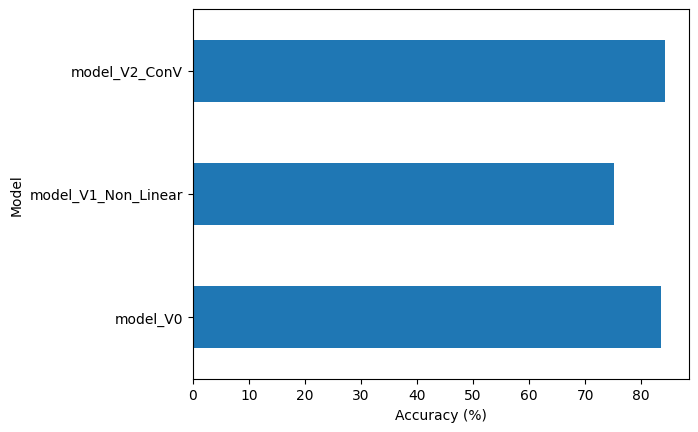

In [ ]:
# Visualize our model
compare_results.set_index("Model_Name")["Model_Accuracy"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.plot()

## Make random predictions and Visualize


In [ ]:
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Get sample on device
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      # Logits
      pred_logit = model(sample)
      # Logits -> Pred Probs
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      # Get Pred Prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())
  # Stack Pred_Probs to turn list into tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k = 9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Coat')

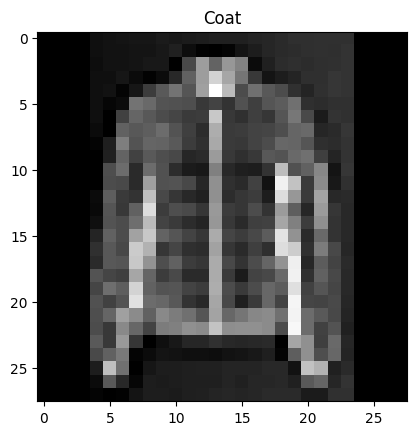

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_name[test_labels[0]])

In [ ]:
# Making Predictions
pred_probs = make_prediction(model = model_V2,
                             data = test_samples)
# View first 2 prediction probabilities
pred_probs[:2]

tensor([[9.7942e-03, 5.9822e-04, 5.0557e-03, 4.7376e-04, 2.5635e-01, 1.0536e-03,
         7.2383e-01, 1.5088e-06, 2.8469e-03, 2.9649e-07],
        [1.9481e-02, 3.9999e-03, 6.9945e-01, 3.3710e-03, 1.1729e-01, 5.6372e-04,
         1.5222e-01, 1.8667e-06, 3.6199e-03, 2.8363e-06]])

In [ ]:
# Conver prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 2, 4, 7, 0, 1, 3, 8, 6])

In [ ]:
test_labels

[4, 2, 6, 7, 0, 1, 3, 2, 0]

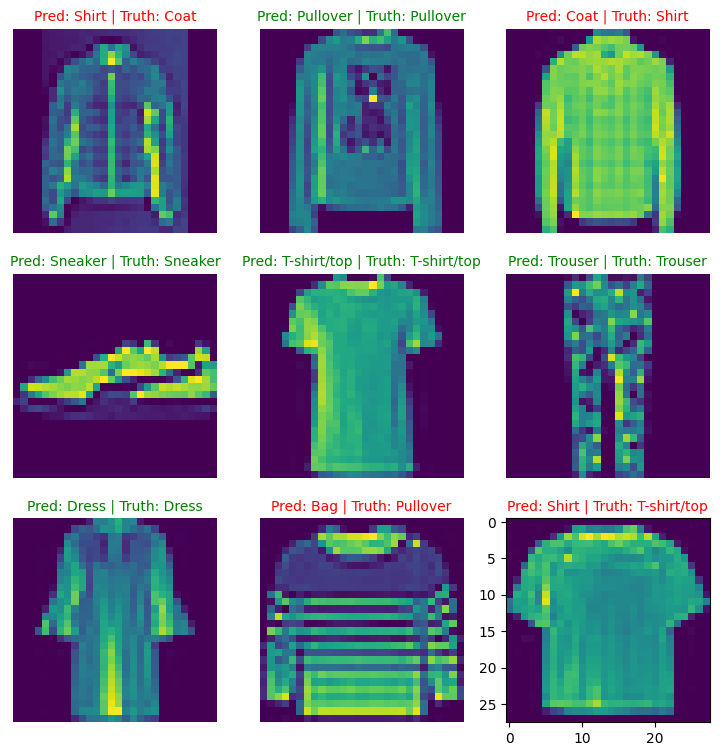

In [ ]:
# Visualize
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
#plt.subplots_adjust(wspace=1, hspace=0.3) # Provide some spacing between subplots
for i, sample in enumerate(test_samples):
  # Subplot
  plt.axis(False)
  plt.subplot(nrows,ncols,i+1) # i starts from 0
  # Plot image
  plt.imshow(test_samples[i].squeeze())
  # Get predictions labels
  prd = class_name[pred_classes[i]]
  # Get True labels
  tru = class_name[test_labels[i]]
  if prd == tru:
    plt.title(f"Pred: {prd} | Truth: {tru}", c = "g", fontsize = 10)
  else:
    plt.title(f"Pred: {prd} | Truth: {tru}", c = "r", fontsize = 10)

## Making a confusion Matrix for further performance evaluation
A confusion matrix is an excellent way of evaluating your classification model.
1. Using our trained model, make predictions on test dataset.
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Visualize the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
import mlxtend
mlxtend.__version__

'0.23.3'

In [ ]:
# 1. Make predictions
pred_probs = []
model_V2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc = "Making Predictions...."):
    # Send data and targets to device
    X,y = X.to(device),y.to(device)
    # Forward Pass
    y_logit = model_V2(X)
    # Logits to Predictions to Labels
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim=1)
    # Put the labels on cpu
    pred_probs.append(y_pred.cpu())

# Concatenate list to turn into tensor
pred_tensor = torch.cat(pred_probs)
pred_tensor



Making Predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 0, 3, 7])

In [ ]:
len(pred_tensor)

10000

In [ ]:
# See if packages are installed otherwise, install them
try:
  import torchmetrics,mlxtend
  print("Libraries Already EXIST")
  print(f"mlxtend version: {mlxtend.__version__}")
  print(f"torchmetrics version: {torchmetrics.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print("Libraries INSTALLING...")
  print(f"mlxtend version: {mlxtend.__version__}")
  print(f"torchmetrics version: {torchmetrics.__version__}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.2 MB/s eta 0:00:00
Libraries INSTALLED...
mlxtend version: 0.23.3
torchmetrics version: 1.6.1


In [ ]:
int(mlxtend.__version__.split(".")[1])

23

In [ ]:
pred_tensor,test_data.targets,test_data.classes

(tensor([9, 2, 1,  ..., 0, 3, 7]),
 tensor([9, 2, 1,  ..., 8, 1, 5]),
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

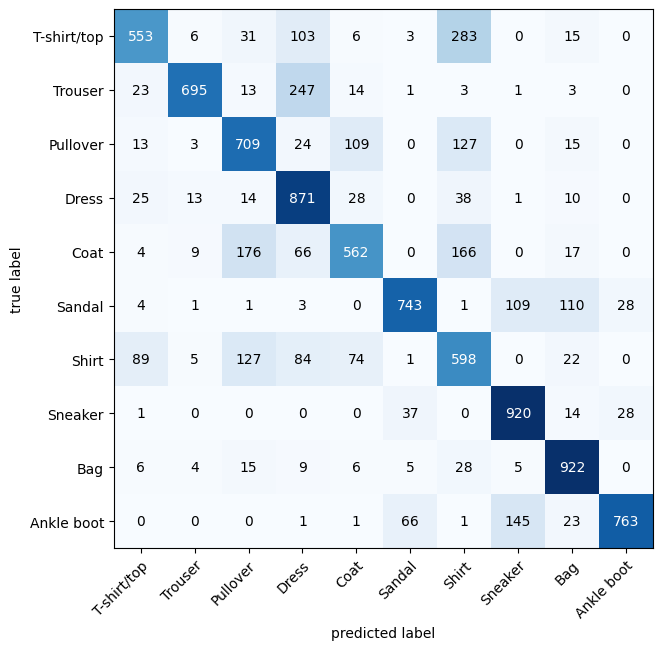

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_name), task = "multiclass")
confmat_tensor = confmat(preds = pred_tensor, target = test_data.targets)

# 3. Plot the Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(), #matplotlib likes working with numpy
                                class_names = class_name,
                                figsize=(10,7)
                                ) # Darker Boxes along the diagonal is a good sign # Ideal Confusion matrix has only the diagonal line as darkened

# Saving & Loading Our Best Model

In [ ]:
from pathlib import Path
# Create Directory
model_path = Path("model")
model_path.mkdir(parents=True,exist_ok=True)

# Model Save Path
model_name = "model_V2_ConV.pth"
model_save_path = model_path / model_name

# Save model
torch.save(obj = model_V2.state_dict(), f = model_save_path)
print(f"Model Saved to: {model_save_path}")

Model Saved to: model/model_V2_ConV.pth


In [ ]:
# Load Model
torch.manual_seed(42)
model_3 = ConvModel(input_shape = 1,
                    hidden_units=10,
                    output_shape=len(class_name)).to(device)
model_3.load_state_dict(torch.load(f = model_save_path))


<ipython-input-68-36887c686038>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_3.load_state_dict(torch.load(f = model_save_path))


<All keys matched successfully>

In [ ]:
# Evaluate Model
torch.manual_seed(42)
model_3_results = eval_mode(model = model_3,
                            model_name = "LOADED MODEL",
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)
model_3_results,model_V2_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'Model_Name': 'LOADED MODEL',
  'Model_Loss': 0.44052499532699585,
  'Model_Accuracy': 84.26517571884985},
 {'Model_Name': 'model_V2_ConV',
  'Model_Loss': 0.44052499532699585,
  'Model_Accuracy': 84.26517571884985})

In [ ]:
# Check if model results are close to eachother
torch.isclose(torch.tensor(model_3_results["Model_Loss"]),
              torch.tensor(model_V2_results["Model_Loss"]),
              )

tensor(True)

# Exercises

# 1. What are 3 areas in industry where computer vision is currently being used?

* Manufacturing (Quality Control & Defect Detection)
* Autonomous Vehicles (Lane Recognition & Obstacle Detection)
* Healthcare (Medical Image Analysis)

# 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting occurs when the model learns the training dataset too well, along with its noises and redundant features. Then, it underperforms in predicting new data.

# 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* Use more data such that the model can train better.
* Use L1 or L2 regularization, adds a penalty term to the loss function to discourage large weights
* Use data augmentation (create artificial data based on training set)
* Use simpler data models
* Spliting the dataset into training, validation, testing datasets.
* Early stopping, stops the model training before it learns the noise within the data.

# 4. Spend 20-minutes reading and clicking through the CNN Explainer website.
Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.

# 5. Load the torchvision.datasets.MNIST() train and test datasets.

In [ ]:
import torch
import torchvision
from torchvision.transforms import ToTensor

train_data = torchvision.datasets.MNIST(root = "traindata",
                                        train = True,
                                        target_transform=None,
                                        download = True,
                                        transform = ToTensor()

                                        )

test_data = torchvision.datasets.MNIST(root = "testdata",
                                       train = False,
                                       download = True,
                                       transform = ToTensor()) # Data comes in as PIL format, ToTensor() transforms it into tensor

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.2MB/s]


Extracting traindata/MNIST/raw/train-images-idx3-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]


Extracting traindata/MNIST/raw/train-labels-idx1-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.86MB/s]


Extracting traindata/MNIST/raw/t10k-images-idx3-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.37MB/s]


Extracting traindata/MNIST/raw/t10k-labels-idx1-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]


Extracting testdata/MNIST/raw/train-images-idx3-ubyte.gz to testdata/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 504kB/s]


Extracting testdata/MNIST/raw/train-labels-idx1-ubyte.gz to testdata/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]


Extracting testdata/MNIST/raw/t10k-images-idx3-ubyte.gz to testdata/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 12.6MB/s]

Extracting testdata/MNIST/raw/t10k-labels-idx1-ubyte.gz to testdata/MNIST/raw



# 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
import matplotlib.pyplot as plt

[]

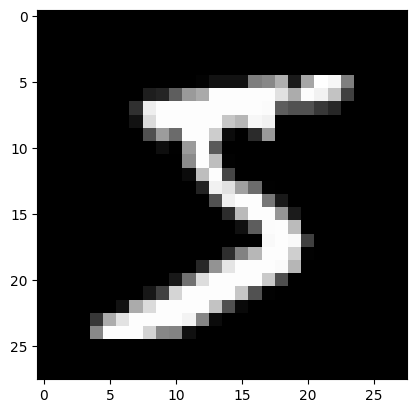

In [ ]:
img = train_data[0][0].squeeze()
plt.imshow(img,cmap="gray")
plt.plot()

In [ ]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

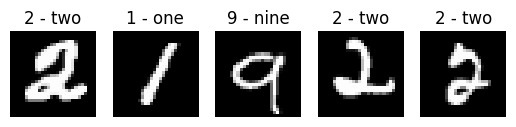

In [ ]:
import random
random.seed(42)
nrows = 1
ncols = 5
for i in range(0,nrows*ncols):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img , label = train_data[random_idx]
  plt.subplot(nrows,ncols,i+1)
  plt.axis(False)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])

# 7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [ ]:
from torch.utils.data import DataLoader

train_DL = DataLoader(dataset = train_data,batch_size = 32,shuffle = True )
test_DL = DataLoader(dataset = test_data, batch_size = 32, shuffle = False)

1875

# 8. Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
train_f, train_L = next(iter(train_DL))
train_f.shape,train_L.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
from torch import nn
class TINYVGG(nn.Module):
  def __init__(self,input_shape,output_shape,hidden_units):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels=hidden_units,kernel_size = 3, stride = 1, padding =1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels=hidden_units,kernel_size = 3, stride = 1, padding =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, # nn.Flatten Gives out [1,784] size. hence to Make 784 -> 16*7*7
                  out_features = output_shape))
  def forward(self,x):
    x = self.block_1(x)
    #print(f"Block 1 Output Shape: {x.shape}")
    x = self.block_2(x)
    #print(f"Block 2 Output Shape: {x.shape}")
    x = self.classifier(x)
    #print(f"Classifier Output Shape: {x.shape}")
    return x


# Create model instance
torch.manual_seed(42)
model = TINYVGG(
    input_shape = 1, # 1 Image
    hidden_units = 16,
    output_shape= len(class_names)
)
model

TINYVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [ ]:
train_data[0][0].shape,len(class_names)

(torch.Size([1, 28, 28]), 10)

In [ ]:
flatten  = nn.Flatten()
img = flatten(train_data[0][0])
img.shape

torch.Size([1, 784])

In [ ]:
img = torch.rand(size=(1,28,28))

In [ ]:
model(img.unsqueeze(0))

tensor([[ 0.0249,  0.0279,  0.0261,  0.0198, -0.0156, -0.0076, -0.0482, -0.0036,
          0.0043,  0.0478]], grad_fn=<AddmmBackward0>)

# 9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

In [ ]:
import requests
from pathlib import Path
if Path("helper_function.py").is_file():
  print("...File Exists Already...")
else:
  print("...Downloading FILE...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

...File Exists Already...


In [ ]:
import helper_function
from helper_function import accuracy_fn
from timeit import default_timer as timer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)
# Training Loop
def Training(model: nn.Module,
             data: torch.utils.data.DataLoader,
             device: torch.device):
  model.to(device)
  model.train()
  train_loss = 0
  train_acc = 0
  for X,y in data:
    X,y = X.to(device),y.to(device)
    # Forward Pass
    y_logits = model(X)
    # Calculate Loss
    loss = loss_fn(y_logits,y)
    train_loss += loss
    train_acc += accuracy_fn(y_pred=y_logits.argmax(dim=1),y_true=y)
    # Optimizer Zero Grad
    optimizer.zero_grad()
    # Loss Backward
    loss.backward()
    # Optimizer step
    optimizer.step()

  train_loss /= len(data)
  train_acc /= len(data)
  print(f"Train Loss: {train_loss} | Train Accuracy: {train_acc:.3f}%")

def testing(model: nn.Module,
             data: torch.utils.data.DataLoader,
             device: torch.device):
  model.to(device)
  test_loss = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for X,y in data:
      X,y = X.to(device),y.to(device)
      test_logits = model(X)
      test_loss += loss_fn(test_logits,y)
      test_acc += accuracy_fn(y_true = y, y_pred = test_logits.argmax(dim=1))

    test_loss /= len(data)
    test_acc /= len(data)
    print(f"Test Loss: {test_loss} | Test Accuracy: {test_acc:.3f}%")

def time(start,end,device):
  total = end - start
  print(f"Total Time on {device} is {total} seconds...")
  return total


In [ ]:
from tqdm.auto import tqdm
epochs = 3
start_time = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  Training(model=model,data=train_DL,device="cpu")
  testing(model=model,data=test_DL,device="cpu")
end_time = timer()
time_cpu=time(start=start_time,end=end_time,device="cpu")

start_time = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  Training(model=model,data=train_DL,device="cuda")
  testing(model=model,data=test_DL,device="cuda")
end_time = timer()
time_gpu=time(start=start_time,end=end_time,device="cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train Loss: 0.04486946389079094 | Train Accuracy: 98.587%
Test Loss: 0.045032814145088196 | Test Accuracy: 98.492%
Epoch: 1
------
Train Loss: 0.04226488620042801 | Train Accuracy: 98.720%
Test Loss: 0.04117511585354805 | Test Accuracy: 98.562%
Epoch: 2
------
Train Loss: 0.039190225303173065 | Train Accuracy: 98.795%
Test Loss: 0.04266040772199631 | Test Accuracy: 98.582%
Total Time on cpu is 103.73887430400009 seconds...


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train Loss: 0.03735189512372017 | Train Accuracy: 98.893%
Test Loss: 0.038232263177633286 | Test Accuracy: 98.712%
Epoch: 1
------
Train Loss: 0.03464649245142937 | Train Accuracy: 98.903%
Test Loss: 0.03764551505446434 | Test Accuracy: 98.742%
Epoch: 2
------
Train Loss: 0.03291676938533783 | Train Accuracy: 98.947%
Test Loss: 0.04792949557304382 | Test Accuracy: 98.403%
Total Time on cuda is 34.1047164670008 seconds...


# 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

In [ ]:

import random
random.seed(100)
test_samples = []
test_labels = []

for samples,labels in random.sample(list(test_data),k=5):
  test_samples.append(samples)
  test_labels.append(labels)

len(test_samples),test_samples[0].shape,class_names[test_labels[0]]

(5, torch.Size([1, 28, 28]), '4 - four')

In [ ]:
model.to("cuda")
pred_prob = []
model.eval()
with torch.inference_mode():
  for sample in test_samples:
    sample = sample.to("cuda")
    sample = sample.unsqueeze(dim=0) # Add batch dimension for model
    logit = model(sample)
    label = torch.softmax(logit.squeeze(),dim = 0) # Single image hence dim = 0, single prediction
    pred_prob.append(label.cpu())
pred_prob = torch.stack(pred_prob) # Turn list into tensor

In [ ]:
type(pred_prob)

torch.Tensor

In [ ]:
pred_prob[:2]

tensor([[1.9062e-13, 1.2785e-05, 7.1527e-10, 1.7784e-10, 9.9888e-01, 4.2849e-07,
         4.5047e-12, 1.1075e-03, 1.4972e-06, 8.1511e-08],
        [2.5857e-08, 2.9106e-05, 9.9996e-01, 5.0720e-07, 2.8239e-13, 6.9757e-11,
         2.3104e-12, 1.3663e-09, 1.4475e-05, 2.4369e-10]])

In [ ]:
pred_class = pred_prob.argmax(dim = 1)
pred_class # Probabilties to Labels

tensor([4, 2, 1, 9, 2])

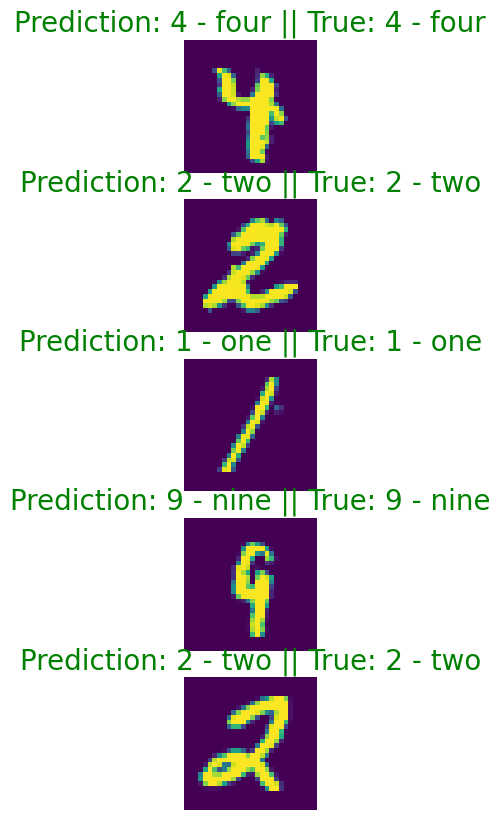

In [ ]:
nrow = 5
ncol = 1
i = 0
plt.figure(figsize=(10,10))
for i in range(0,nrow*ncol):
  plt.subplot(nrow,ncol,i+1)
  plt.axis(False)
  plt.imshow(test_samples[i].squeeze())
  if class_names[pred_class[i]] == class_names[test_labels[i]]:
    plt.title(f"Prediction: {class_names[pred_class[i]]} || True: {class_names[test_labels[i]]}", c = "green",fontsize = 20)
  else:
    plt.title(f"Prediction: {class_names[pred_class[i]]} || True: {class_names[test_labels[i]]}", c = "red", fontsize = 20)


# 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.6 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
preds = []
model.eval()
with torch.inference_mode():
  for X,y in tqdm(test_DL, desc="--- MAKING PREDICTIONS ---"):
    X = X.to("cuda")
    y = y.to("cuda")
    logits = model(X)
    pred = torch.softmax(logits,dim=1).argmax(dim=1) # Softmax dim = 1 because of batches
    preds.append(pred.cpu())
pred_ten = torch.cat(preds) # Concatenate list of predictions into a tensor
len(pred_ten),pred_ten[:10]

--- MAKING PREDICTIONS ---:   0%|          | 0/313 [00:00<?, ?it/s]

(10000, tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

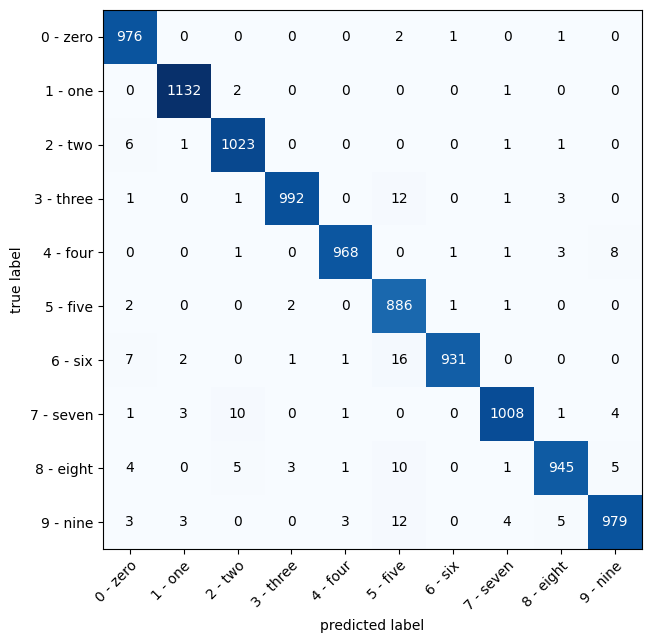

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Make Confusion matrix
conf = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
conf_tensor = conf(preds = pred_ten , target = test_data.targets)

# Visualize
fig, ax = plot_confusion_matrix(conf_mat=conf_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7))

# 12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

#13. Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualizing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?